### Score: `[86]`

Q1. `[23]` 注意 1.1 国家和地区区别；  1.3 对本国的统计.

Q2. `[8]` 对数据的处理，需要再看一下说明。

Q3. `[39.5]` 部分小问需要注意。

Q4. `[15.5]` good! what about your findings。

In [191]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [192]:
# 1

Sig_Eqs = pd.read_csv(r'D:\ESE2024\ESE2024\earthquakes-2024-10-31_10-05-18_+0800.tsv',sep='\t')

In [193]:
Sig_Eqs.info

<bound method DataFrame.info of      Search Parameters    Year    Mo    Dy    Hr    Mn   Sec     Tsu     Vol  \
0                   []     NaN   NaN   NaN   NaN   NaN   NaN     NaN     NaN   
1                  NaN -2150.0   NaN   NaN   NaN   NaN   NaN     NaN     NaN   
2                  NaN -2000.0   NaN   NaN   NaN   NaN   NaN     1.0     NaN   
3                  NaN -2000.0   NaN   NaN   NaN   NaN   NaN     NaN     NaN   
4                  NaN -1610.0   NaN   NaN   NaN   NaN   NaN     3.0  1351.0   
...                ...     ...   ...   ...   ...   ...   ...     ...     ...   
6439               NaN  2024.0   8.0   8.0   7.0  42.0  55.0  5922.0     NaN   
6440               NaN  2024.0   8.0  17.0  19.0  10.0  26.0  5923.0  7571.0   
6441               NaN  2024.0   9.0  18.0   2.0  41.0   6.0     NaN     NaN   
6442               NaN  2024.0   9.0  23.0  23.0  14.0  19.0  5938.0     NaN   
6443               NaN  2024.0  10.0  16.0   7.0  46.0  32.0     NaN     NaN   

       

In [ ]:
#1.1
# NOTE: 国家，不是地区
# 按国家分组并计算总死亡人数  
total_deaths = Sig_Eqs.groupby('Location Name')['Deaths'].sum().reset_index()  

print(total_deaths)

# 排序并获取前20个国家  
top_20_countries = total_deaths.sort_values(by='Deaths', ascending=False).head(20).reset_index()  

# 打印结果  
print(top_20_countries)

                                   Location Name  Deaths
0                                    AFGHANISTAN     0.0
1                AFGHANISTAN-TAJIKISTAN:  RAKHOR     0.0
2     AFGHANISTAN-TAJIKISTAN:  YAR HUSAIN, ASTOR     1.0
3                         AFGHANISTAN:  AIKHANUM     0.0
4               AFGHANISTAN:  BADAKHSHAN, TAKHAR  4700.0
...                                          ...     ...
3990          YEMEN:  WESTERN  ARABIAN PENINSULA    11.0
3991                               YEMEN:  ZABID    10.0
3992                       YEMEN:  ZABID,BAHRAIN    60.0
3993                     YEMEN:  ZABID,SANA,ADAN    61.0
3994                             ZAMBIA:  KAPUTA     0.0

[3995 rows x 2 columns]
    index                              Location Name    Deaths
0     681                   CHINA:  SHAANXI PROVINCE  830313.0
1    3653                 TURKEY:  ANTAKYA (ANTIOCH)  474870.0
2    1379                     HAITI:  PORT-AU-PRINCE  316000.0
3    2021                              

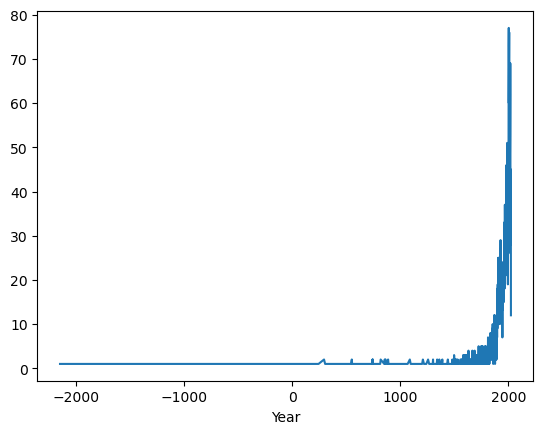

In [31]:
#1.2
#  Count the total number of days with magnitude higher than 3 each year.

data = Sig_Eqs[Sig_Eqs['Mag'] > 3]
Sig_Eqs['Ms'] = data.groupby('Year').size().plot()


In [ ]:
#1.3

def CountEq_LargestEq(dataframe, country):  
 
    
    # 过滤出特定国家的数据  
    country_data = dataframe[dataframe['Location Name'] == country]  
    
    # 计算地震总数  
    total_eq = country_data.shape[0]  
    # BUG: Sig_Eqs -> country_data, 不然不是本国的统计
    largest_eq = Sig_Eqs.loc[Sig_Eqs['Mag'].idxmax()]  
    largest_date = largest_eq['Year']  
    largest_location = largest_eq['Location Name']  

    
    return total_eq, largest_date, largest_location  

# 假设 Sig_Eqs 是包含地震数据的 DataFrame  
# 获取所有国家的列表  
countries = Sig_Eqs['Location Name'].unique()  

# 存储结果  
results = []  

# 对每个国家应用 CountEq_LargestEq 函数  
for country in countries:  
    total, largest_date, largest_location = CountEq_LargestEq(Sig_Eqs, country)  
    results.append((country, total, largest_date, largest_location))  

# 转换为 DataFrame  
results_df = pd.DataFrame(results, columns=['Location Name', 'Total_Earthquakes', 'Largest_Date', 'Largest_Location'])  

results_df = results_df.sort_values(by='Total_Earthquakes', ascending=False)  

print(results_df)  

                                   Location Name  Total_Earthquakes  \
451                      CHINA:  YUNNAN PROVINCE                 68   
815                       RUSSIA:  KURIL ISLANDS                 53   
47                                        TURKEY                 47   
337                     CHINA:  SICHUAN PROVINCE                 46   
1786                             SOLOMON ISLANDS                 34   
...                                          ...                ...   
1546        INDONESIA:  SUMATERA:  BREUEH ISLAND                  1   
1547                           URUGUAY:  COLOGNE                  1   
1548                          CHINA:  BOHAI GULF                  1   
1549  NEW ZEALAND:  SOUTH ISLAND: AMURI DISTRICT                  1   
0                                            NaN                  0   

      Largest_Date                Largest_Location  
451         1960.0  CHILE:  PUERTO MONTT, VALDIVIA  
815         1960.0  CHILE:  PUERTO MONTT,

In [183]:
#2

data = pd.read_csv(r'D:\ESE2024\ESE2024\Baoan_Weather_1998_2022.csv')
data.head(5)

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_9588\2855230477.py:2: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'D:\ESE2024\ESE2024\Baoan_Weather_1998_2022.csv')


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,REPORT_TYPE.1,SA1,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,SY-MT,NaN,"10184,1",4,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1"
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1"
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1"
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,SY-MT,NaN,"10185,1",4,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1"
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1"


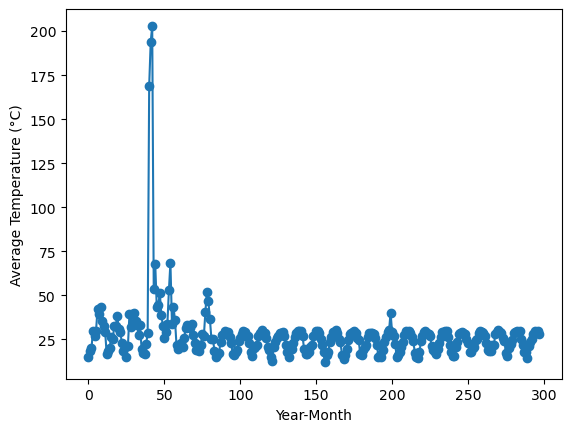

In [ ]:
#2

# 数据清洗  
# 去掉前导的加号，将逗号替换为小数点
# BUG: 数据说明需要再看一下，data['TMP'].str.replace(',', '.', regex=False) 后面那个数用于标注数据来源不是小数点
data['TMP'] = data['TMP'].astype(str)  # 转换为字符串类型 
data['TMP'] = data['TMP'].str.replace('+', '', regex=False)  
data['TMP'] = data['TMP'].str.replace(',', '.', regex=False)  
data['TMP'] = pd.to_numeric(data['TMP'], errors='coerce')  

# 计算实际温度  
data['Actual_Temp'] = data['TMP'] / 10  

# 将日期列转换为datetime格式（假设日期在'DATE'列）  
data['DATE'] = pd.to_datetime(data['DATE'])  

# 提取年份和月份  
data['Year'] = data['DATE'].dt.year  
data['Month'] = data['DATE'].dt.month  

# 过滤过去25年数据  
recent_data = data[data['Year'] >= (data['Year'].max() - 25)]  

# 计算每月平均温度  
monthly_avg_temp = recent_data.groupby(['Year', 'Month'])['Actual_Temp'].mean().reset_index()  

# 绘图  
plt.plot(monthly_avg_temp['Actual_Temp'], marker='o')  # NOTE: 这样的话横坐标会有点奇怪
plt.xlabel('Year-Month')  
plt.ylabel('Average Temperature (°C)') 
plt.show()  


根据说明书：对于实际数值，需除以10进行转换；而4代表通过粗略限制检查，数据来自NCEI数据源。所以首先讲逗号变为小数点，＋号都去掉，并处理格式。从图中可以发现，存在一些异常值，月平均气温在25℃上下浮动。

In [15]:
#3
import pandas as pd
df = pd.read_csv(r'..\\Assignment2_common_files\\ibtracs.ALL.list.v04r00.csv',
                 usecols=['NAME','WMO_WIND','ISO_TIME','SID','BASIN','LAT','LON'],
                 skiprows=[1], 
                 parse_dates=['ISO_TIME'],
                 na_values=[''])
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce') 
print(df['ISO_TIME'].dtypes)
df.head(10)

datetime64[ns]


,SID,BASIN,NAME,ISO_TIME,LAT,LON,WMO_WIND
0,1842298N11080,NI,NOT_NAMED,1842-10-25 03:00:00,10.9000,80.3000,NaN
1,1842298N11080,NI,NOT_NAMED,1842-10-25 06:00:00,10.8709,79.8265,NaN
2,1842298N11080,NI,NOT_NAMED,1842-10-25 09:00:00,10.8431,79.3524,NaN
3,1842298N11080,NI,NOT_NAMED,1842-10-25 12:00:00,10.8188,78.8772,NaN
4,1842298N11080,NI,NOT_NAMED,1842-10-25 15:00:00,10.8000,78.4000,NaN
5,1842298N11080,NI,NOT_NAMED,1842-10-25 18:00:00,10.7884,77.9194,NaN
6,1842298N11080,NI,NOT_NAMED,1842-10-25 21:00:00,10.7845,77.4299,NaN
7,1842298N11080,NI,NOT_NAMED,1842-10-26 00:00:00,10.7884,76.9256,NaN
8,1842298N11080,NI,NOT_NAMED,1842-10-26 03:00:00,10.8000,76.4000,NaN
9,1842298N11080,NI,NOT_NAMED,1842-10-26 06:00:00,10.8096,75.8424,NaN


In [16]:
#3.1

large_hurricanes = df.nlargest(10, 'WMO_WIND')[['NAME', 'WMO_WIND']] # BUG: Group the data on Storm Identifie

print(large_hurricanes)  

             NAME  WMO_WIND
665955   PATRICIA     185.0
665953   PATRICIA     180.0
665957   PATRICIA     180.0
427637      ALLEN     165.0
178210  NOT_NAMED     160.0
178211  NOT_NAMED     160.0
178213  NOT_NAMED     160.0
482075    GILBERT     160.0
552460      LINDA     160.0
605747      WILMA     160.0


Axes(0.125,0.11;0.775x0.77)


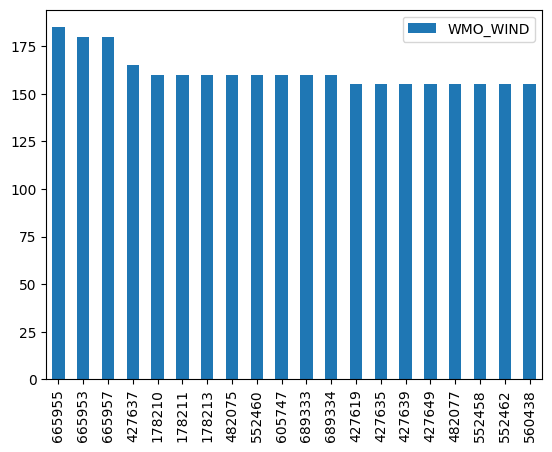

In [17]:
#3.2

strong_hurricanes = df.nlargest(20, 'WMO_WIND')[['NAME', 'WMO_WIND']].plot(kind='bar')

print(strong_hurricanes)  

<Axes: xlabel='BASIN'>

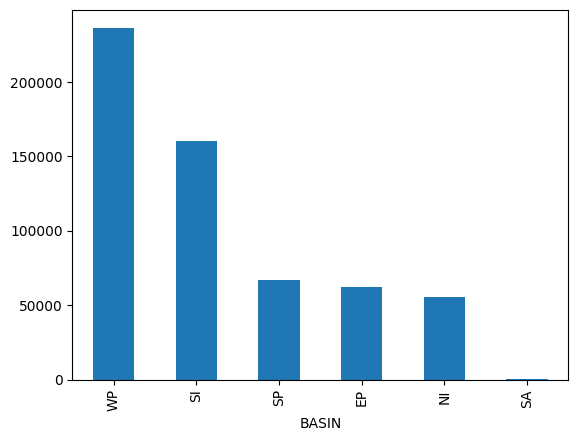

In [18]:
#3.3

# 使用value_counts统计一列中重复值出现的次数

df['BASIN'].value_counts().plot(kind='bar')

<Axes: xlabel='LAT', ylabel='LON'>

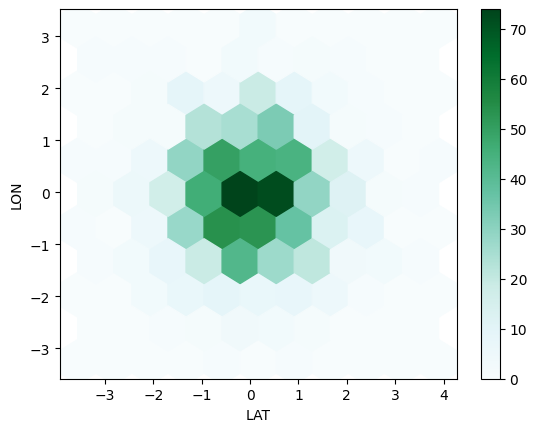

In [13]:
#3.4
#绘制六角形箱体图
import numpy as np
# BUG: 请用题目数据 
df = pd.DataFrame(np.random.randn(1000, 2),columns=['LAT', 'LON'])

#生成一个1000行2列的数组，包含从标准正态分布中抽取的随机数（均值为0，标准差为1）

df.plot.hexbin(x='LAT', y='LON', gridsize=10)

#左边坐标表示的是值的分布
#右边是数据量大小与颜色的对比，gridsize=10指的是大小

<Axes: xlabel='LON', ylabel='LAT'>

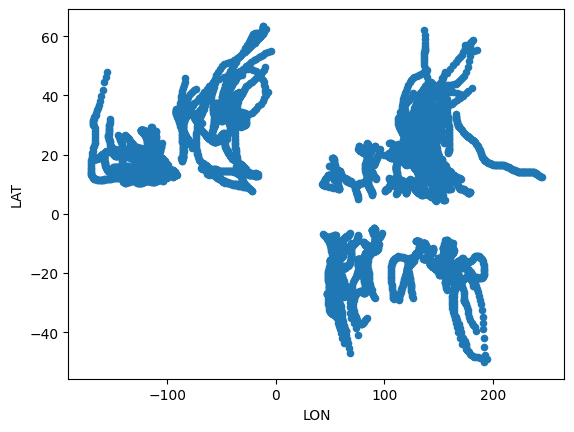

In [19]:
#3.5
Typhoon_Mangkhut = df[df['ISO_TIME'].dt.year == 2018]
# NOTE: 此处筛选条件少了一个 Typhoon Mangkhut： df[(df['ISO_TIME'].dt.year == 2018) & ...]
Typhoon_Mangkhut.plot.scatter(x='LON',y='LAT')

In [20]:
#3.6

filtered_df = df[(df['BASIN'].isin(['WP', 'EP'])) & (df['ISO_TIME'].dt.year >= 1970)] 

filtered_df.head(10)

,SID,BASIN,NAME,ISO_TIME,LAT,LON,WMO_WIND
350394,1970050N07151,WP,NANCY,1970-02-19 00:00:00,7.00000,151.400,NaN
350395,1970050N07151,WP,NANCY,1970-02-19 03:00:00,7.24752,151.205,NaN
350396,1970050N07151,WP,NANCY,1970-02-19 06:00:00,7.50000,151.000,NaN
350397,1970050N07151,WP,NANCY,1970-02-19 09:00:00,7.75747,150.772,NaN
350398,1970050N07151,WP,NANCY,1970-02-19 12:00:00,8.00000,150.500,NaN
350399,1970050N07151,WP,NANCY,1970-02-19 15:00:00,8.21871,150.180,NaN
350400,1970050N07151,WP,NANCY,1970-02-19 18:00:00,8.44444,149.811,NaN
350401,1970050N07151,WP,NANCY,1970-02-19 21:00:00,8.60053,149.378,NaN
350402,1970050N07151,WP,NANCY,1970-02-20 00:00:00,8.66667,148.973,NaN
350403,1970050N07151,WP,NANCY,1970-02-20 03:00:00,8.70486,148.555,NaN


<Axes: xlabel='ISO_TIME'>

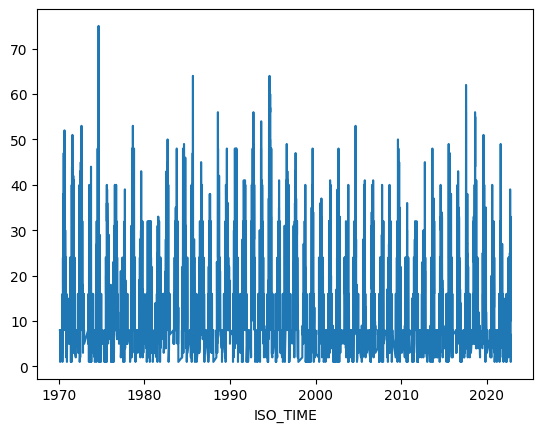

In [21]:
#3.7

daily_counts = filtered_df.groupby(df['ISO_TIME'].dt.date).size() 

daily_counts.plot(kind='line')  

C:\Users\w\AppData\Local\Temp\ipykernel_2156\3055400108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_of_year'] = filtered_df['ISO_TIME'].dt.day_of_year


<Axes: xlabel='day_of_year'>

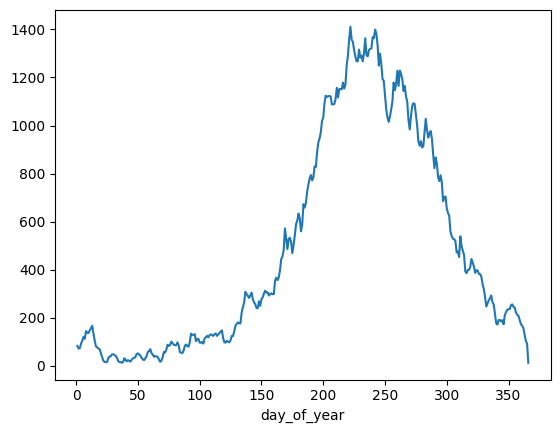

In [22]:
#3.8

filtered_df['day_of_year'] = filtered_df['ISO_TIME'].dt.day_of_year  
#将日期转换为年份中的第几天（1到365或366），并将结果存储在新列 day_of_year 中

climatology = filtered_df.groupby('day_of_year').size()  

climatology.plot(kind='line')  

<Axes: xlabel='ISO_TIME'>

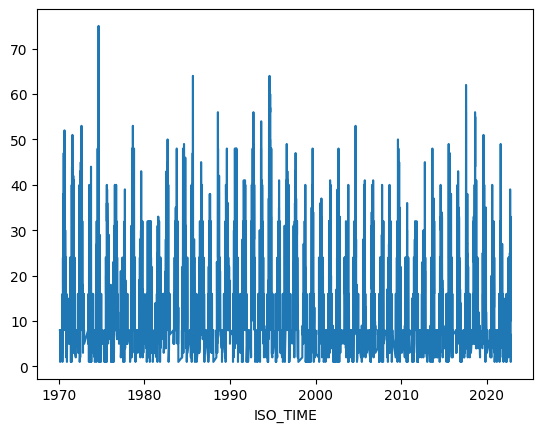

In [23]:
#3.9
# BUG here
anomaly = daily_counts - climatology.reindex(daily_counts.index, fill_value=0)  
anomaly.plot(kind='line')

In [24]:
#3.10

filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'])  # 确保转换为日期时间格式  
filtered_df.set_index('ISO_TIME', inplace=True)  # 设置为索引  

# 按年重采样异常时间序列  
annual_anomaly = anomaly.resample('Y').sum() 

annual_anomaly.plot()


C:\Users\w\AppData\Local\Temp\ipykernel_2156\3588925460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'])  # 确保转换为日期时间格式
C:\Users\w\AppData\Local\Temp\ipykernel_2156\3588925460.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomaly = anomaly.resample('Y').sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# NOTE: 事实上你需要将 anomaly.index -> pd.to_datetime 之后 .resample('Y').sum()
anomaly.index

Index([1970-02-19, 1970-02-20, 1970-02-21, 1970-02-22, 1970-02-23, 1970-02-24,
       1970-02-25, 1970-02-26, 1970-02-27, 1970-02-28,
       ...
       2022-09-29, 2022-09-30, 2022-10-01, 2022-10-02, 2022-10-03, 2022-10-04,
       2022-10-05, 2022-10-09, 2022-10-10, 2022-10-12],
      dtype='object', name='ISO_TIME', length=10817)

结合GPT和网站查阅如何绘制六角形箱体图以及异常值的检索

In [35]:
#4

ds = pd.read_csv(r'50_-50_40_-40.csv',
                usecols=['DATE','ONE_BOX_NUM',],
                 parse_dates=['DATE'],
                 na_values=[''])

ds.head(5)

,DATE,ONE_BOX_NUM
0,2006-12-01,82
1,2006-12-01,44
2,2006-12-01,34
3,2006-12-01,6
4,2006-12-01,84


In [124]:
#4.1

ds_cleaned = ds.dropna()

print(ds_cleaned.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7676 entries, 0 to 7675
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         7676 non-null   datetime64[ns]
 1   ONE_BOX_NUM  7676 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 120.1 KB
None


<Axes: xlabel='DATE'>

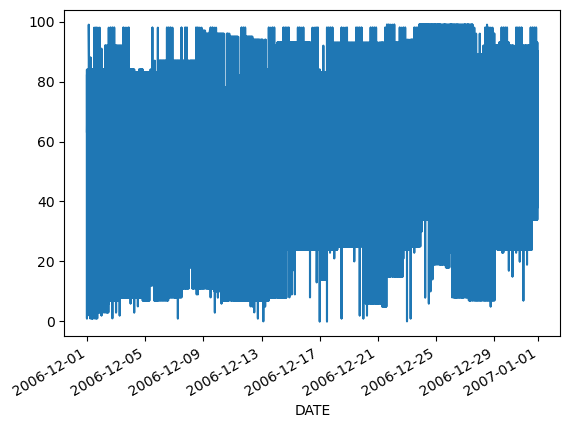

In [125]:
#4.2

# 确保日期列被解析为 datetime 类型  
ds_cleaned['DATE'] = pd.to_datetime(ds_cleaned['DATE'])  

# Reset index to have a time series
ds_cleaned = ds_cleaned.set_index('DATE')

# Plot a  time series
ds_cleaned['ONE_BOX_NUM'].plot()

In [126]:
#4.3

# 计算均值  
mean = ds_cleaned['ONE_BOX_NUM'].mean()  
print(mean)  

57.70179781136008


In [127]:
#4.3

# 计算中位数  
median = ds_cleaned['ONE_BOX_NUM'].median()  
print(median)  

68.0


In [130]:
#4.3

# 计算标准差  
std = ds_cleaned['ONE_BOX_NUM'].std()  
print(std)  

27.419511860053902


In [131]:
#4.3

# 计算最小值
min = ds_cleaned['ONE_BOX_NUM'].min()  
print(min)  

0


In [132]:
#4.3

# 计算最大值
max = ds_cleaned['ONE_BOX_NUM'].max()  
print(max)  

99


4.1通过GPT了解数据清洗的方法，并了解了4.3题目的意思。